In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


############################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importação dos dados, Analise Exploratória e Tratamento de Dados

In [61]:
df_dados = pd.read_excel("ml_project1_data.xlsx")

In [62]:
df_dados.shape

(2240, 29)

In [63]:
df_dados.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [64]:
df_dados.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [65]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [66]:
df_dados.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [67]:
df_dados.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [68]:
variaveis_numericas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
            print(i, ':' , df_dados.dtypes[i])
            variaveis_numericas.append(i)

ID : int64
Year_Birth : int64
Income : float64
Kidhome : int64
Teenhome : int64
Recency : int64
MntWines : int64
MntFruits : int64
MntMeatProducts : int64
MntFishProducts : int64
MntSweetProducts : int64
MntGoldProds : int64
NumDealsPurchases : int64
NumWebPurchases : int64
NumCatalogPurchases : int64
NumStorePurchases : int64
NumWebVisitsMonth : int64
AcceptedCmp3 : int64
AcceptedCmp4 : int64
AcceptedCmp5 : int64
AcceptedCmp1 : int64
AcceptedCmp2 : int64
Complain : int64
Z_CostContact : int64
Z_Revenue : int64
Response : int64


In [69]:
variaveis_numericas

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

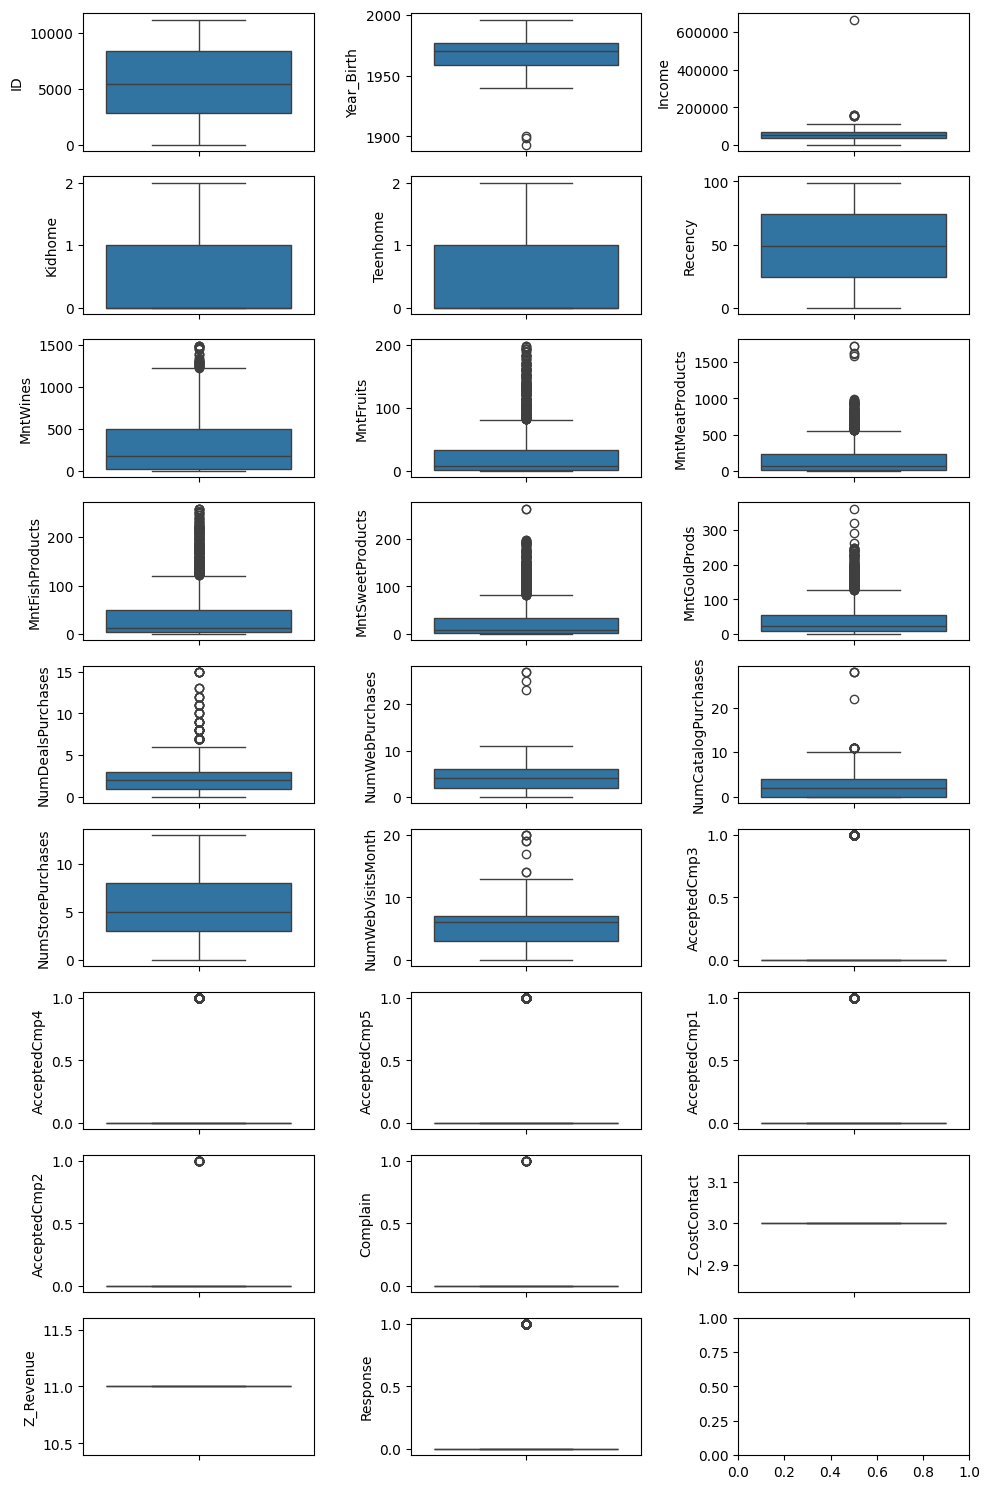

In [70]:
n_vars = len(variaveis_numericas)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

plt.rcParams["figure.figsize"] = [10.00, 15.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(n_rows, n_cols)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha, coluna])
    coluna += 1
    if coluna == n_cols:
        linha += 1
        coluna = 0

plt.show()


#variavel year-birth com outliers - não faz sentido
#avaliação boa, os dados fazem sentido

In [71]:
df_dados.loc[df_dados['Year_Birth'] < 1910]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [72]:
df_novo = df_dados.loc[df_dados['Year_Birth'] >= 1910]
df_novo.loc[df_novo['Year_Birth'] < 1910]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [73]:
df_novo.groupby(['Education']).size()

,0
Education,
2n Cycle,201
Basic,54
Graduation,1127
Master,370
PhD,485


In [74]:
#Absurd e Yolo (me parece erro de preenchimento)
#Alone e Single = mesma classificação
df_novo.groupby(['Marital_Status']).size()

,0
Marital_Status,
Absurd,2
Alone,3
Divorced,231
Married,864
Single,479
Together,579
Widow,77
YOLO,2


In [75]:
df_dados_limpos = df_novo.copy()

df_dados_limpos = df_dados_limpos[~df_dados_limpos['Marital_Status'].isin(['YOLO', 'Absurd'])]

df_dados_limpos['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [76]:
df_dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2233 non-null   int64         
 1   Year_Birth           2233 non-null   int64         
 2   Education            2233 non-null   object        
 3   Marital_Status       2233 non-null   object        
 4   Income               2209 non-null   float64       
 5   Kidhome              2233 non-null   int64         
 6   Teenhome             2233 non-null   int64         
 7   Dt_Customer          2233 non-null   datetime64[ns]
 8   Recency              2233 non-null   int64         
 9   MntWines             2233 non-null   int64         
 10  MntFruits            2233 non-null   int64         
 11  MntMeatProducts      2233 non-null   int64         
 12  MntFishProducts      2233 non-null   int64         
 13  MntSweetProducts     2233 non-null   i

In [77]:
df_dados_limpos.groupby(['Marital_Status']).size()

,0
Marital_Status,
Divorced,231
Married,864
Single,482
Together,579
Widow,77


In [78]:
variaveis_categoricas = []
for i in df_dados_limpos.columns[0:48].tolist():
    if df_dados_limpos.dtypes[i].name in ['object', 'category']:
        print(i, ':' , df_dados_limpos.dtypes[i])
        variaveis_categoricas.append(i)

Education : object
Marital_Status : object


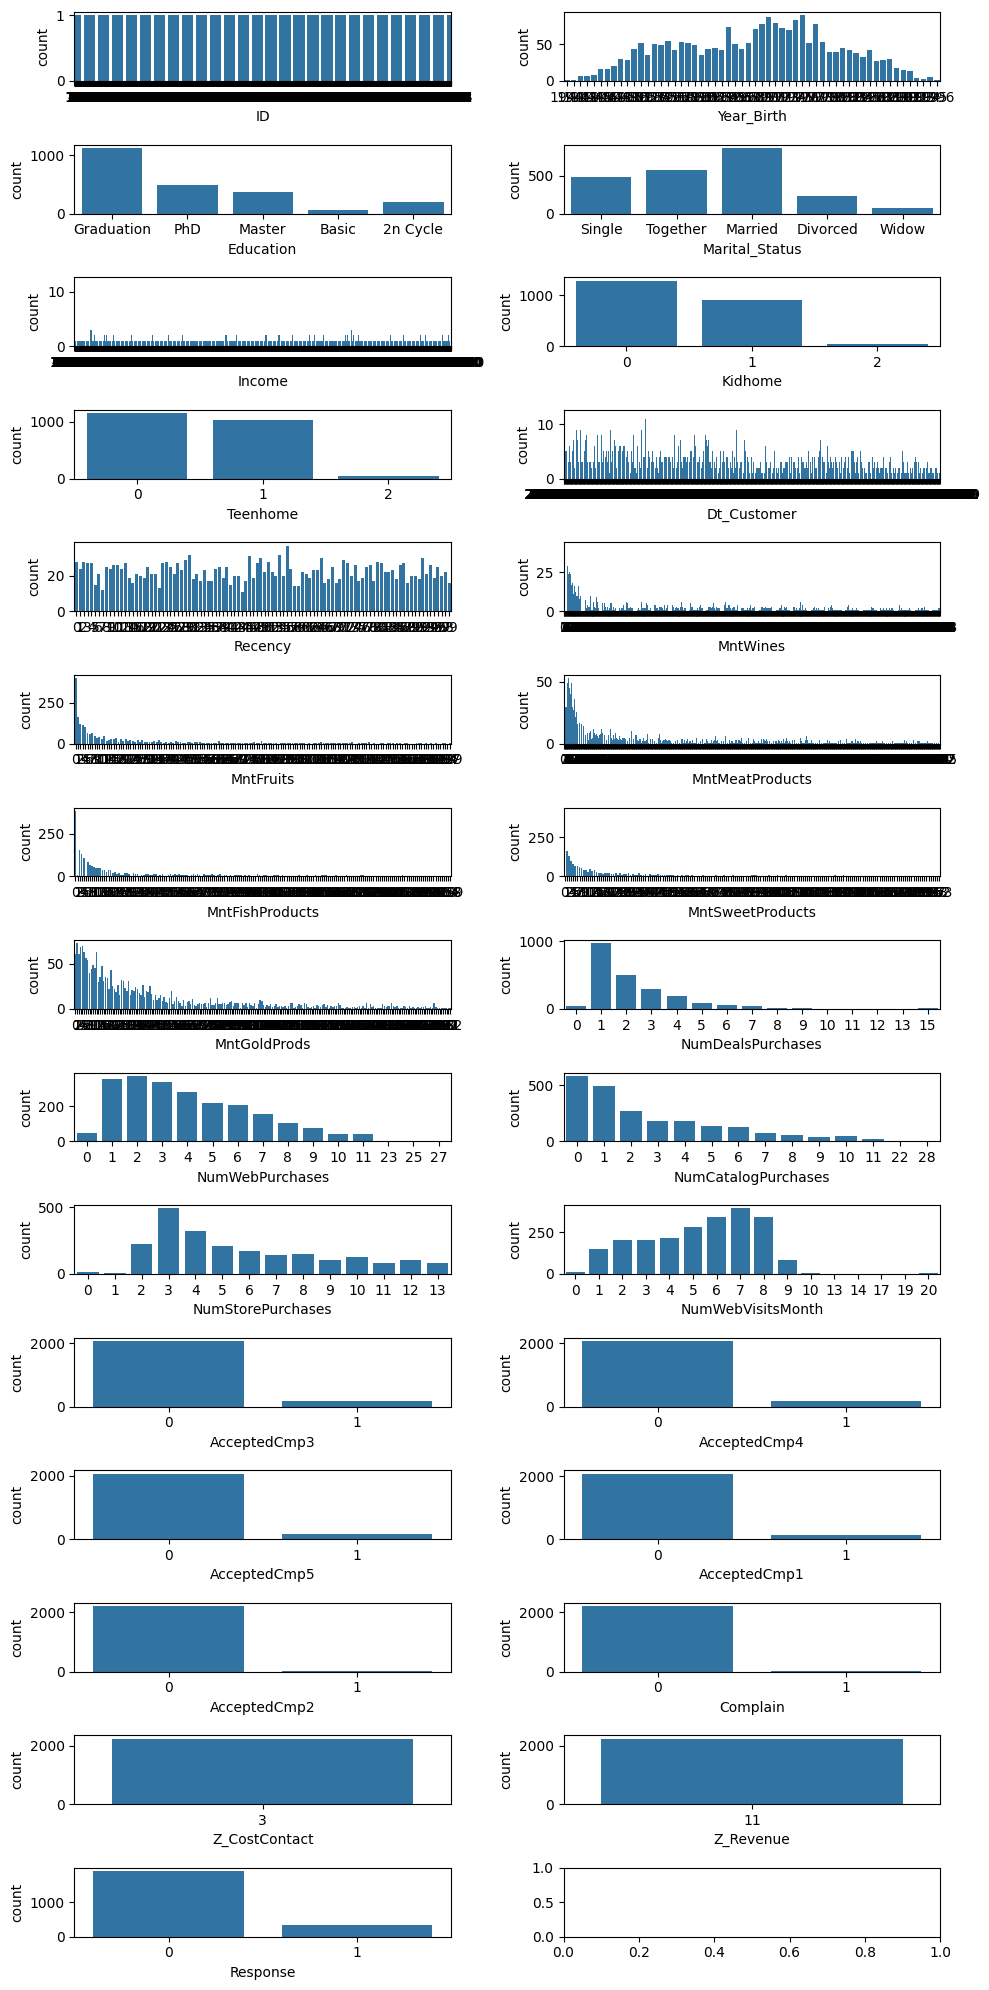

In [79]:
plt.rcParams["figure.figsize"] = [10.00, 20.00]
plt.rcParams["figure.autolayout"] = True

n_graficos = len(df_dados_limpos.columns)
n_colunas = 2
n_linhas = int(np.ceil(n_graficos / n_colunas))

f, axes = plt.subplots(n_linhas, n_colunas)

linha = 0
coluna = 0

for i in df_dados_limpos.columns:
    sns.countplot(data=df_dados_limpos, x=i, ax=axes[linha, coluna])

    coluna += 1
    if coluna == n_colunas:
        linha += 1
        coluna = 0

plt.tight_layout()
plt.show()


#achei bem ok a distribuição

In [80]:
#vou usar essa variavel como target
df_dados_limpos['Score'] = df_dados_limpos['AcceptedCmp1'] + df_dados_limpos['AcceptedCmp2'] + df_dados_limpos['AcceptedCmp3'] + df_dados_limpos['AcceptedCmp4'] + df_dados_limpos ['AcceptedCmp5'] + df_dados_limpos ['Response']

In [81]:
df_dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2233 non-null   int64         
 1   Year_Birth           2233 non-null   int64         
 2   Education            2233 non-null   object        
 3   Marital_Status       2233 non-null   object        
 4   Income               2209 non-null   float64       
 5   Kidhome              2233 non-null   int64         
 6   Teenhome             2233 non-null   int64         
 7   Dt_Customer          2233 non-null   datetime64[ns]
 8   Recency              2233 non-null   int64         
 9   MntWines             2233 non-null   int64         
 10  MntFruits            2233 non-null   int64         
 11  MntMeatProducts      2233 non-null   int64         
 12  MntFishProducts      2233 non-null   int64         
 13  MntSweetProducts     2233 non-null   i

In [82]:
df_dados_limpos.groupby('Score').size()

,0
Score,
0,1627
1,368
2,142
3,50
4,36
5,10


## Pré Processamento dos Dados

In [83]:
lb = LabelEncoder()

df_dados_limpos['Education'] = lb.fit_transform(df_dados_limpos['Education'])
df_dados_limpos['Marital_Status'] = lb.fit_transform(df_dados_limpos['Marital_Status'])


df_dados.dropna(inplace = True)

In [84]:
df_dados_limpos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Score
0,5524,1957,2,2,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,2174,1954,2,2,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0
2,4141,1965,2,3,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,2,3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0


In [85]:
df_dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2233 non-null   int64         
 1   Year_Birth           2233 non-null   int64         
 2   Education            2233 non-null   int64         
 3   Marital_Status       2233 non-null   int64         
 4   Income               2209 non-null   float64       
 5   Kidhome              2233 non-null   int64         
 6   Teenhome             2233 non-null   int64         
 7   Dt_Customer          2233 non-null   datetime64[ns]
 8   Recency              2233 non-null   int64         
 9   MntWines             2233 non-null   int64         
 10  MntFruits            2233 non-null   int64         
 11  MntMeatProducts      2233 non-null   int64         
 12  MntFishProducts      2233 non-null   int64         
 13  MntSweetProducts     2233 non-null   i

In [86]:
target = df_dados_limpos.iloc[:,29]

In [87]:
target.value_counts()

,count
Score,
0,1627
1,368
2,142
3,50
4,36
5,10


In [88]:
preditoras = df_dados_limpos.copy()

del preditoras['Score']
del preditoras['ID']
del preditoras ['Dt_Customer']
del preditoras['Z_CostContact']
del preditoras['Z_Revenue']

preditoras.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,2,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,2,3,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,2,3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [89]:
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

In [90]:
# normalização em treino e teste
# Padronização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

In [91]:
clf = RandomForestClassifier()

In [92]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [93]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_treino_normalizados = imputer. fit_transform(X_treino_normalizados)

n_estimators = np.array([100,150,200,250,300])
max_depth = np.array([10,20])
criterion = np.array(["gini"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([2, 5])
min_samples_leaf = np.array([1,2,3])
bootstrap = np.array([True,False])

grid_parametros = dict(n_estimators=n_estimators,
                       max_depth=max_depth,
                       criterion=criterion,
                       max_features=max_features,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       bootstrap=bootstrap)

clf = RandomForestClassifier()

clf = GridSearchCV(clf, grid_parametros, cv = 3, n_jobs = 8)

inicio = time.time()
clf.fit(X_treino_normalizados, y_treino)
fim = time.time()

treinos = pd.DataFrame(clf.cv_results_)

print(f"Acurácia: {clf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {clf.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos.shape[0])

Acurácia: 98.14%

Hiperparâmetros Ideais: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tempo de Treinamento do Modelo:  881.63

Numero de treinamentos realizados:  360


In [94]:
treinos.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.282727,0.158492,0.068496,0.025731,True,gini,10,sqrt,1,2,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.961612,0.961612,0.953935,0.959053,0.003619,183
1,3.151390,1.499687,0.168814,0.069588,True,gini,10,sqrt,1,2,150,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.957774,0.965451,0.955854,0.959693,0.004146,177
2,6.014788,1.648193,0.290926,0.073619,True,gini,10,sqrt,1,2,200,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.961612,0.957774,0.959693,0.959693,0.001567,177
3,5.780585,0.419528,0.413634,0.031839,True,gini,10,sqrt,1,2,250,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.965451,0.967370,0.955854,0.962892,0.005038,153
4,9.587898,0.991688,0.356411,0.091594,True,gini,10,sqrt,1,2,300,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.959693,0.952015,0.953935,0.955214,0.003262,232


In [95]:
clf = RandomForestClassifier(n_estimators  = 300, criterion = 'gini', max_depth = 20, max_features = None,
                              min_samples_leaf = 1, min_samples_split = 5, bootstrap = True)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, y_treino)

In [96]:
scores = clf.score(X_treino_normalizados,y_treino)
scores

0.9987204094689699

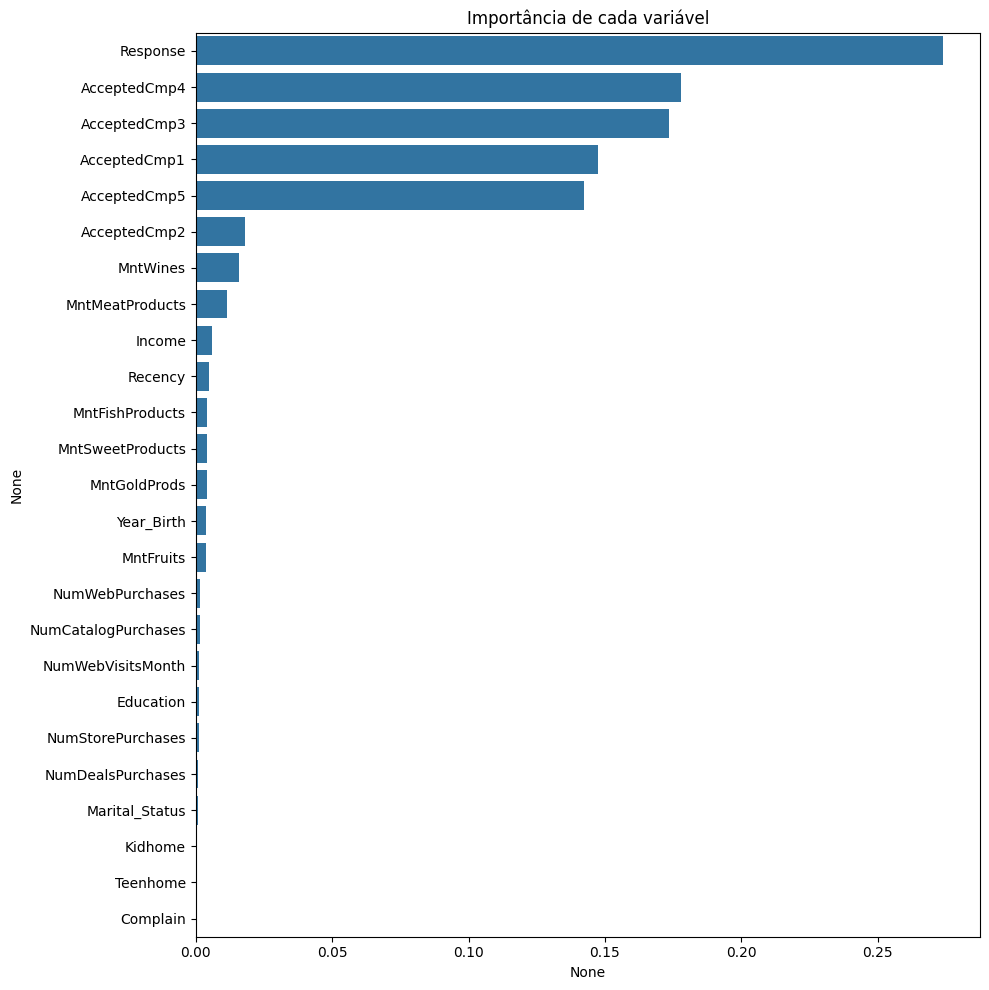

In [97]:
# faz sentido?
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [98]:
importances.sort_values(ascending = False)

,0
Response,0.273805
AcceptedCmp4,0.177891
AcceptedCmp3,0.173561
AcceptedCmp1,0.147510
AcceptedCmp5,0.142296
AcceptedCmp2,0.018196
MntWines,0.015797
MntMeatProducts,0.011589
Income,0.005994
Recency,0.004854


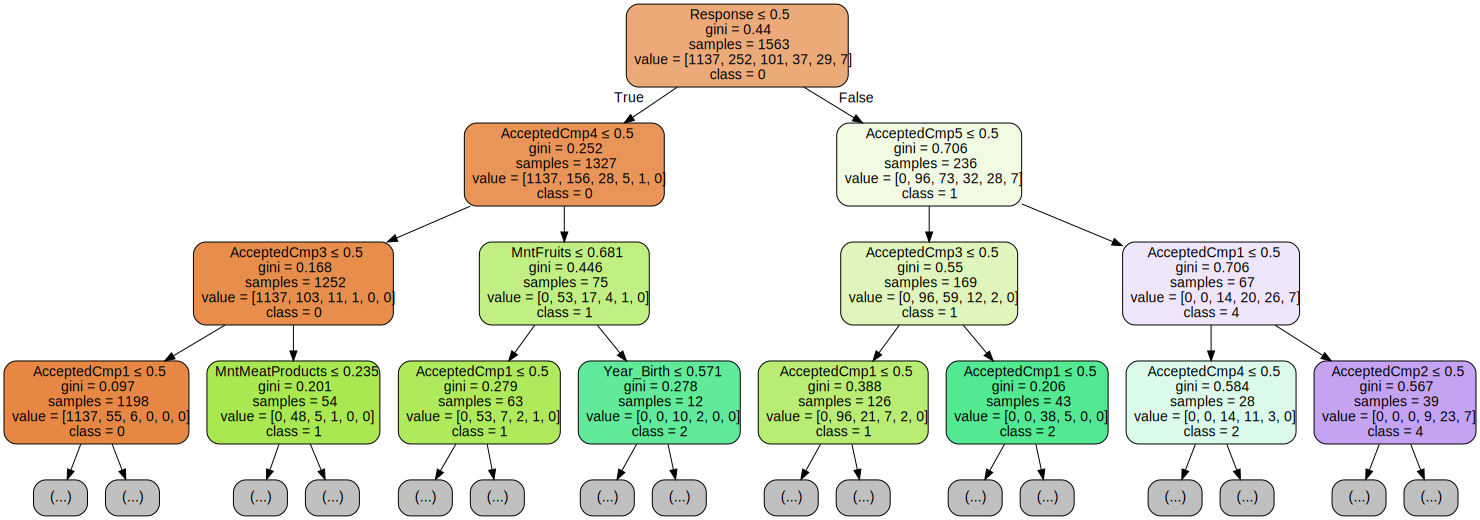

In [133]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image, display


dot_data = export_graphviz(clf_tree.best_estimator_, out_file=None)

feature_names = ['Year_Birth', 'Education', 'Marital_Status', 'Income',
                 'Kidhome', 'Teenhome', 'Recency', 'MntFruits',
                 'MntWines', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                 'Complain', 'Response']

dot_data = export_graphviz(clf_tree.best_estimator_,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=['0', '1', '2', '3', '4', '5', '6'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=3)


graph = graphviz.Source(dot_data)
display(graph)

In [146]:
#teste modelo 1
imputer = SimpleImputer(strategy='mean') # or other strategy like 'median'
X_treino = imputer.fit_transform(X_treino)

clf.fit(X_treino, y_treino)

Year_Birth =  1980
Education = 3
Marital_Status = 1
Income =  36640
Kidhome =  0
Teenhome =  0
Recency =  23
MntFruits =  11
MntWines =  80
MntMeatProducts = 15
MntFishProducts = 45
MntSweetProducts = 11
MntGoldProds =  7
NumDealsPurchases = 2
NumWebPurchases =  5
NumCatalogPurchases = 20
NumStorePurchases = 1
NumWebVisitsMonth =  4
AcceptedCmp3 =  0
AcceptedCmp4 =  1
AcceptedCmp5 =  1
AcceptedCmp1 =  0
AcceptedCmp2 =  0
Complain =  1
Response =  1

novos_dados =[Year_Birth ,
Education ,
Marital_Status ,
Income ,
Kidhome ,
Teenhome ,
Recency ,
MntFruits ,
MntWines ,
MntMeatProducts ,
MntFishProducts ,
MntSweetProducts ,
MntGoldProds ,
NumDealsPurchases ,
NumWebPurchases ,
NumCatalogPurchases ,
NumStorePurchases ,
NumWebVisitsMonth ,
AcceptedCmp3 ,
AcceptedCmp4 ,
AcceptedCmp5 ,
AcceptedCmp1 ,
AcceptedCmp2 ,
Complain ,
Response
]

x =np.array(novos_dados).reshape(1,-1)
x = sc.transform(x)


print("Cliente possibilidade:", clf.predict(x))

Cliente possibilidade: [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
